## Building a classification model based on the below problem statement:

Building a model to predict whether a person will be interested in the company proposed Health plan/policy given the information about:

* Demographics (city, age, region etc.)
* Information regarding holding policies of the customer
* Recommended Policy Information

### Import required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

### Load Training data for visualization:

In [3]:
df = pd.read_csv('train_data.csv')
df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


### Check for information on dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


From the above information, we could see that there are 3 different categories of data present:

* int64 : Integer values for the 6 columns ID, Region_code, Upper_age, Lower_age, Reco_Policy_cat, Response. ID filed would be removed from further calculations as it does not contribute to the predictions
* float64 : Floating values for the 2 columns Holding_Policy_Type, Reco_Policy_Premium
* object : Categorical values for 6 columns City_Code, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health Indicator, Holding_Policy_Duration.

In [5]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [6]:
# Dropping ID column as it does not yeild anything
df.drop(columns='ID', axis=1, inplace=True)

In [7]:
df.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [8]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Check for Value Counts for Categorical Variables:

In [9]:
# Find all categorical variables:
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
for var in cat_vars:
    print(var)

City_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator
Holding_Policy_Duration


In [10]:
df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [11]:
df['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [12]:
df['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [13]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [14]:
df['City_Code'].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

From the above data, we see that Holding_Policy_Duration & Holding_Policy_Type are classified as a categorical data because of missing values.
We will check further for missing values.

### Check for variables with Missing Values:

In [15]:
# Find variables with missing data
mis_vars = [var for var in df.columns if df[var].isnull().sum()>0]
# Print missing data count for the variables
df[mis_vars].isnull().sum()

Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
dtype: int64

Of the above 3 variables, Health Indicator is a categorical variables whereas the other 2 are numerical variables. 
Lets check for unique values for Health Indicator.

In [16]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

### Mode Imputation:

In [17]:
df['Health Indicator'].isnull().sum()

11691

In [18]:
df['Health Indicator'].mode()[0]

'X1'

In [19]:
df['Health Indicator'] = df['Health Indicator'].fillna(df['Health Indicator'].mode()[0])
df['Health Indicator'].isnull().sum()

0

In [20]:
df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

### Mean Imputation:

In [21]:
df['Holding_Policy_Duration'].head()

0    14+
1    NaN
2    1.0
3    14+
4    3.0
Name: Holding_Policy_Duration, dtype: object

In [22]:
df['Holding_Policy_Duration'].mode()[0]

'1.0'

In [23]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0])
df['Holding_Policy_Duration'].isnull().sum()

0

In [24]:
df['Holding_Policy_Type'].mean()

2.4392282328360158

In [25]:
np.around(df['Holding_Policy_Type'].mean())

2.0

In [26]:
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(np.around(df['Holding_Policy_Type'].mean()))
df['Holding_Policy_Type'].isnull().sum()

0

In [27]:
[var for var in df.columns if df[var].isnull().sum()>0]

[]

In [28]:
# All missing data has been handled

In [29]:
# df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(float)
df.Holding_Policy_Duration = df.Holding_Policy_Duration.str.replace('[+]', '')
df['Holding_Policy_Duration'].head()

0     14
1    1.0
2    1.0
3     14
4    3.0
Name: Holding_Policy_Duration, dtype: object

In [30]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(float)

### Numerical Variables:

In [31]:
num_vars = [var for var in df.columns if df[var].dtypes!='O']

for var in num_vars:
    print(var)

Region_Code
Upper_Age
Lower_Age
Holding_Policy_Duration
Holding_Policy_Type
Reco_Policy_Cat
Reco_Policy_Premium
Response


In [32]:
df[num_vars].head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3213,36,36,14.0,3.0,22,11628.0,0
1,1117,75,22,1.0,2.0,22,30510.0,0
2,3732,32,32,1.0,1.0,19,7450.0,1
3,4378,52,48,14.0,3.0,19,17780.0,0
4,2190,44,44,3.0,1.0,16,10404.0,0


In [33]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [34]:
final_cat_vars = [var for var in df.columns if df[var].dtypes=='O']
for var in final_cat_vars:
    print(var)

City_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator


In [35]:
for var in final_cat_vars:
    print(df[var].value_counts())

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
No     42460
Yes     8422
Name: Is_Spouse, dtype: int64
X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64


### Checking for Outliers in Dataset:

In [36]:
num_vars

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

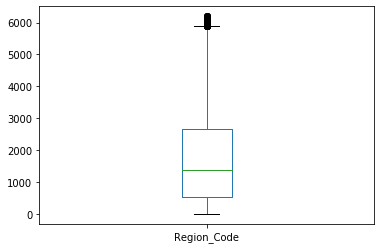

In [37]:
df['Region_Code'].plot(kind='box')

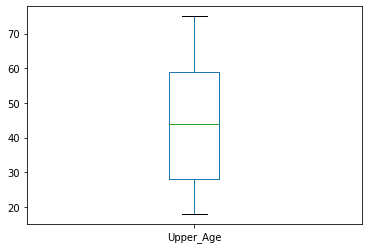

In [38]:
df['Upper_Age'].plot(kind='box')

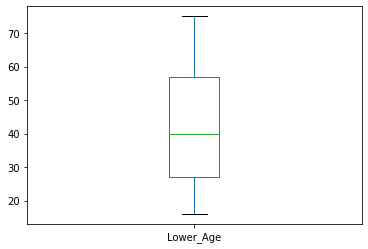

In [39]:
df['Lower_Age'].plot(kind='box')

In [40]:
# df['Holding_Policy_Duration'].plot(kind='bar')
# df['Holding_Policy_Type'].plot(kind='bar')
# df['Reco_Policy_Cat'].plot(kind='bar')
# df['Reco_Policy_Premium'].plot(kind='bar')

### Label Encoding categorical variables:

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
final_cat_vars

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

In [43]:
city_code_le = LabelEncoder()
city_code_labels = city_code_le.fit_transform(df['City_Code'])
city_code_mappings = {index: label for index, label in 
                  enumerate(city_code_le.classes_)}
city_code_mappings

{0: 'C1',
 1: 'C10',
 2: 'C11',
 3: 'C12',
 4: 'C13',
 5: 'C14',
 6: 'C15',
 7: 'C16',
 8: 'C17',
 9: 'C18',
 10: 'C19',
 11: 'C2',
 12: 'C20',
 13: 'C21',
 14: 'C22',
 15: 'C23',
 16: 'C24',
 17: 'C25',
 18: 'C26',
 19: 'C27',
 20: 'C28',
 21: 'C29',
 22: 'C3',
 23: 'C30',
 24: 'C31',
 25: 'C32',
 26: 'C33',
 27: 'C34',
 28: 'C35',
 29: 'C36',
 30: 'C4',
 31: 'C5',
 32: 'C6',
 33: 'C7',
 34: 'C8',
 35: 'C9'}

In [44]:
df['City_Code_Labels'] = city_code_labels
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Labels
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,22
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.0,22,30510.0,0,31
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1,31
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,16
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,34


In [45]:
final_cat_vars

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

In [46]:
Accomodation_Type_le = LabelEncoder()
Accomodation_Type_labels = Accomodation_Type_le.fit_transform(df['Accomodation_Type'])
Accomodation_Type_mappings = {index: label for index, label in 
                  enumerate(Accomodation_Type_le.classes_)}
print(Accomodation_Type_mappings)

Reco_Insurance_Type_le = LabelEncoder()
Reco_Insurance_Type_labels = Reco_Insurance_Type_le.fit_transform(df['Reco_Insurance_Type'])
Reco_Insurance_Type_mappings = {index: label for index, label in 
                  enumerate(Reco_Insurance_Type_le.classes_)}
print(Reco_Insurance_Type_mappings)

Is_Spouse_le = LabelEncoder()
Is_Spouse_labels = Is_Spouse_le.fit_transform(df['Is_Spouse'])
Is_Spouse_mappings = {index: label for index, label in 
                  enumerate(Is_Spouse_le.classes_)}
print(Is_Spouse_mappings)

Health_Indicator_le = LabelEncoder()
Health_Indicator_labels = Health_Indicator_le.fit_transform(df['Health Indicator'])
Health_Indicator_mappings = {index: label for index, label in 
                  enumerate(Health_Indicator_le.classes_)}
print(Health_Indicator_mappings)

{0: 'Owned', 1: 'Rented'}
{0: 'Individual', 1: 'Joint'}
{0: 'No', 1: 'Yes'}
{0: 'X1', 1: 'X2', 2: 'X3', 3: 'X4', 4: 'X5', 5: 'X6', 6: 'X7', 7: 'X8', 8: 'X9'}


In [47]:
df['Accomodation_Type_Labels'] = Accomodation_Type_labels
df['Reco_Insurance_Type_Labels'] = Reco_Insurance_Type_labels
df['Is_Spouse_Labels'] = Is_Spouse_labels
df['Health_Indicator_Labels'] = Health_Indicator_labels
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Labels,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,22,1,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.0,22,30510.0,0,31,0,1,0,1
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1,31,0,0,0,0
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,16,0,1,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,34,1,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 18 columns):
City_Code                     50882 non-null object
Region_Code                   50882 non-null int64
Accomodation_Type             50882 non-null object
Reco_Insurance_Type           50882 non-null object
Upper_Age                     50882 non-null int64
Lower_Age                     50882 non-null int64
Is_Spouse                     50882 non-null object
Health Indicator              50882 non-null object
Holding_Policy_Duration       50882 non-null float64
Holding_Policy_Type           50882 non-null float64
Reco_Policy_Cat               50882 non-null int64
Reco_Policy_Premium           50882 non-null float64
Response                      50882 non-null int64
City_Code_Labels              50882 non-null int32
Accomodation_Type_Labels      50882 non-null int32
Reco_Insurance_Type_Labels    50882 non-null int32
Is_Spouse_Labels              50882 non-null int32
Health_Indica

In [49]:
df.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response', 'City_Code_Labels',
       'Accomodation_Type_Labels', 'Reco_Insurance_Type_Labels',
       'Is_Spouse_Labels', 'Health_Indicator_Labels'],
      dtype='object')

### Dropping categorical variables:

In [50]:
train_df = df.copy()
train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Labels,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,22,1,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.0,22,30510.0,0,31,0,1,0,1
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1,31,0,0,0,0
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,16,0,1,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,34,1,0,0,1


In [51]:
train_df.drop(columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],axis=1,inplace=True)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
Region_Code                   50882 non-null int64
Upper_Age                     50882 non-null int64
Lower_Age                     50882 non-null int64
Holding_Policy_Duration       50882 non-null float64
Holding_Policy_Type           50882 non-null float64
Reco_Policy_Cat               50882 non-null int64
Reco_Policy_Premium           50882 non-null float64
Response                      50882 non-null int64
City_Code_Labels              50882 non-null int32
Accomodation_Type_Labels      50882 non-null int32
Reco_Insurance_Type_Labels    50882 non-null int32
Is_Spouse_Labels              50882 non-null int32
Health_Indicator_Labels       50882 non-null int32
dtypes: float64(3), int32(5), int64(5)
memory usage: 4.1 MB


In [53]:
train_df.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Labels,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,3213,36,36,14.0,3.0,22,11628.0,0,22,1,0,0,0
1,1117,75,22,1.0,2.0,22,30510.0,0,31,0,1,0,1
2,3732,32,32,1.0,1.0,19,7450.0,1,31,0,0,0,0
3,4378,52,48,14.0,3.0,19,17780.0,0,16,0,1,0,0
4,2190,44,44,3.0,1.0,16,10404.0,0,34,1,0,0,1


In [54]:
X_train = train_df.drop(['Response'],axis=1).values
y_train = df['Response'].values
X_train.shape, y_train.shape

((50882, 12), (50882,))

<b>Since Training data is now ready, we will check for the test data and do feature engineering if needed.<b>

In [55]:
ini_test_df = pd.read_csv('test_data.csv')
ini_test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [56]:
ini_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


### Performing all feature engineering steps performed on training data:

In [57]:
test_mis_vars = [var for var in ini_test_df.columns if ini_test_df[var].isnull().sum()>0]
ini_test_df[test_mis_vars].isnull().sum()

Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64

### Mode Imputation for missing categorical data:

In [58]:
ini_test_df['Health Indicator'].mode()[0]

'X1'

In [59]:
ini_test_df['Health Indicator'] = ini_test_df['Health Indicator'].fillna(ini_test_df['Health Indicator'].mode()[0])
ini_test_df['Health Indicator'].isnull().sum()

0

In [60]:
ini_test_df[test_mis_vars].isnull().sum()

Health Indicator              0
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
dtype: int64

In [61]:
ini_test_df['Holding_Policy_Duration'] = ini_test_df['Holding_Policy_Duration'].fillna(ini_test_df['Holding_Policy_Duration'].mode()[0])
ini_test_df['Holding_Policy_Duration'].isnull().sum()

0

In [62]:
ini_test_df[test_mis_vars].isnull().sum()

Health Indicator              0
Holding_Policy_Duration       0
Holding_Policy_Type        8603
dtype: int64

### Mean Imputation for missing numerical data:

In [63]:
ini_test_df['Holding_Policy_Type'] = ini_test_df['Holding_Policy_Type'].fillna(np.around(ini_test_df['Holding_Policy_Type'].mean()))
ini_test_df['Holding_Policy_Type'].isnull().sum()

0

In [64]:
ini_test_df.Holding_Policy_Duration = ini_test_df.Holding_Policy_Duration.str.replace('[+]', '')
ini_test_df['Holding_Policy_Duration'] = ini_test_df['Holding_Policy_Duration'].astype(float)
ini_test_df['Holding_Policy_Duration'].head()

0     6.0
1     3.0
2     2.0
3     3.0
4    14.0
Name: Holding_Policy_Duration, dtype: float64

In [65]:
ini_test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,14.0,2.0,5,22534.0


In [66]:
[var for var in ini_test_df.columns if ini_test_df[var].isnull().sum()>0]

[]

In [67]:
test_cat_vars = [var for var in ini_test_df.columns if ini_test_df[var].dtypes=='O']
test_cat_vars

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator']

### Label Encoding for categorical variables:

In [68]:
test_City_Code_le = LabelEncoder()
test_City_Code_labels = test_City_Code_le.fit_transform(ini_test_df['City_Code'])
test_City_Code_mappings = {index: label for index, label in 
                  enumerate(test_City_Code_le.classes_)}
print(test_City_Code_mappings)

test_Accomodation_Type_le = LabelEncoder()
test_Accomodation_Type_labels = test_Accomodation_Type_le.fit_transform(ini_test_df['Accomodation_Type'])
test_Accomodation_Type_mappings = {index: label for index, label in 
                  enumerate(test_Accomodation_Type_le.classes_)}
print(test_Accomodation_Type_mappings)

test_Reco_Insurance_Type_le = LabelEncoder()
test_Reco_Insurance_Type_labels = test_Reco_Insurance_Type_le.fit_transform(ini_test_df['Reco_Insurance_Type'])
test_Reco_Insurance_Type_mappings = {index: label for index, label in 
                  enumerate(test_Reco_Insurance_Type_le.classes_)}
print(test_Reco_Insurance_Type_mappings)

test_Is_Spouse_le = LabelEncoder()
test_Is_Spouse_labels = test_Is_Spouse_le.fit_transform(ini_test_df['Is_Spouse'])
test_Is_Spouse_mappings = {index: label for index, label in 
                  enumerate(test_Is_Spouse_le.classes_)}
print(test_Is_Spouse_mappings)

test_Health_Indicator_le = LabelEncoder()
test_Health_Indicator_labels = test_Health_Indicator_le.fit_transform(ini_test_df['Health Indicator'])
test_Health_Indicator_mappings = {index: label for index, label in 
                  enumerate(test_Health_Indicator_le.classes_)}
print(test_Health_Indicator_mappings)

{0: 'C1', 1: 'C10', 2: 'C11', 3: 'C12', 4: 'C13', 5: 'C14', 6: 'C15', 7: 'C16', 8: 'C17', 9: 'C18', 10: 'C19', 11: 'C2', 12: 'C20', 13: 'C21', 14: 'C22', 15: 'C23', 16: 'C24', 17: 'C25', 18: 'C26', 19: 'C27', 20: 'C28', 21: 'C29', 22: 'C3', 23: 'C30', 24: 'C31', 25: 'C32', 26: 'C33', 27: 'C34', 28: 'C35', 29: 'C36', 30: 'C4', 31: 'C5', 32: 'C6', 33: 'C7', 34: 'C8', 35: 'C9'}
{0: 'Owned', 1: 'Rented'}
{0: 'Individual', 1: 'Joint'}
{0: 'No', 1: 'Yes'}
{0: 'X1', 1: 'X2', 2: 'X3', 3: 'X4', 4: 'X5', 5: 'X6', 6: 'X7', 7: 'X8', 8: 'X9'}


In [69]:
ini_test_df['City_Code_Labesl'] = test_City_Code_labels
ini_test_df['Accomodation_Type_Labels'] = test_Accomodation_Type_labels
ini_test_df['Reco_Insurance_Type_Labels'] = test_Reco_Insurance_Type_labels
ini_test_df['Is_Spouse_Labels'] = test_Is_Spouse_labels
ini_test_df['Health_Indicator_Labels'] = test_Health_Indicator_labels
ini_test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Labesl,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0,0,0,0,0,0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,30,0,1,1,0
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0,1,0,0,2
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,22,1,0,0,2
4,50887,C1,951,Owned,Individual,75,75,No,X3,14.0,2.0,5,22534.0,0,0,0,0,2


In [70]:
ini_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 18 columns):
ID                            21805 non-null int64
City_Code                     21805 non-null object
Region_Code                   21805 non-null int64
Accomodation_Type             21805 non-null object
Reco_Insurance_Type           21805 non-null object
Upper_Age                     21805 non-null int64
Lower_Age                     21805 non-null int64
Is_Spouse                     21805 non-null object
Health Indicator              21805 non-null object
Holding_Policy_Duration       21805 non-null float64
Holding_Policy_Type           21805 non-null float64
Reco_Policy_Cat               21805 non-null int64
Reco_Policy_Premium           21805 non-null float64
City_Code_Labesl              21805 non-null int32
Accomodation_Type_Labels      21805 non-null int32
Reco_Insurance_Type_Labels    21805 non-null int32
Is_Spouse_Labels              21805 non-null int32
Health_Indica

### Dropping Categorical Variables from test data:

In [71]:
test_df = ini_test_df.copy()
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Labesl,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0,0,0,0,0,0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,30,0,1,1,0
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0,1,0,0,2
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,22,1,0,0,2
4,50887,C1,951,Owned,Individual,75,75,No,X3,14.0,2.0,5,22534.0,0,0,0,0,2


In [72]:
test_df.drop(columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'],axis=1,inplace=True)

In [73]:
test_df.head()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Labesl,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,50883,156,30,30,6.0,3.0,5,11934.0,0,0,0,0,0
1,50884,7,69,68,3.0,3.0,18,32204.8,30,0,1,1,0
2,50885,564,28,28,2.0,4.0,17,9240.0,0,1,0,0,2
3,50886,1177,23,23,3.0,3.0,18,9086.0,22,1,0,0,2
4,50887,951,75,75,14.0,2.0,5,22534.0,0,0,0,0,2


In [74]:
test_df.drop(columns=['ID'],axis=1, inplace=True)
test_df.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Labesl,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,156,30,30,6.0,3.0,5,11934.0,0,0,0,0,0
1,7,69,68,3.0,3.0,18,32204.8,30,0,1,1,0
2,564,28,28,2.0,4.0,17,9240.0,0,1,0,0,2
3,1177,23,23,3.0,3.0,18,9086.0,22,1,0,0,2
4,951,75,75,14.0,2.0,5,22534.0,0,0,0,0,2


### Scaling Train and Test Data:

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_test = test_df.values
X_test.shape

(21805, 12)

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementing Machine Learning Classification Model:

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Making predictions using Logistic Regression Algorithm:

In [83]:
logistic_reg = LogisticRegression()

In [84]:
logistic_reg.fit(X_train, y_train)

E:\Users\User.DESKTOP-3HHGVTH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
logistic_model_preds = logistic_reg.predict(X_test)

In [88]:
logistic_model_preds.shape

(21805,)

In [89]:
logistic_pred_data = pd.DataFrame({'ID':ini_test_df.ID, 'Response':logistic_model_preds})
logistic_pred_data.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [90]:
logistic_pred_data.to_csv('Logistic-Regression-Pred.csv',index=False)

### Making predictions using Decision Tree Classifier Algorithm:

In [92]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=4, max_depth=3)

In [93]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
decision_tree_preds = decision_tree.predict(X_test)
decision_tree_preds.shape

(21805,)

In [96]:
decision_tree_pred_data = pd.DataFrame({'ID':ini_test_df.ID, 'Response':decision_tree_preds})
decision_tree_pred_data.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [97]:
decision_tree_pred_data.to_csv('Decision-Tree-Pred.csv',index=False)

### Making predictions using SVM & Grid Search Algorithm:

In [99]:
from sklearn.model_selection import GridSearchCV

In [102]:
# Finding best hyperparameter combination
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[10,1,0.5,0.01,0.05,0.001,0.005,0.0001]}

### New Feature Engineering:

In [109]:
new_train_df = df.copy()
new_train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Labels,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0,22,1,0,0,0
1,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.0,22,30510.0,0,31,0,1,0,1
2,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1,31,0,0,0,0
3,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0,16,0,1,0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,34,1,0,0,1


In [114]:
new_train_df.drop(columns=['Is_Spouse','Accomodation_Type','Reco_Insurance_Type'],axis=1,inplace=True)

In [115]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 11 columns):
Upper_Age                     50882 non-null int64
Lower_Age                     50882 non-null int64
Holding_Policy_Duration       50882 non-null float64
Holding_Policy_Type           50882 non-null float64
Reco_Policy_Cat               50882 non-null int64
Reco_Policy_Premium           50882 non-null float64
Response                      50882 non-null int64
Accomodation_Type_Labels      50882 non-null int32
Reco_Insurance_Type_Labels    50882 non-null int32
Is_Spouse_Labels              50882 non-null int32
Health_Indicator_Labels       50882 non-null int32
dtypes: float64(3), int32(4), int64(4)
memory usage: 3.5 MB


In [116]:
new_train_df.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,36,36,14.0,3.0,22,11628.0,0,1,0,0,0
1,75,22,1.0,2.0,22,30510.0,0,0,1,0,1
2,32,32,1.0,1.0,19,7450.0,1,0,0,0,0
3,52,48,14.0,3.0,19,17780.0,0,0,1,0,0
4,44,44,3.0,1.0,16,10404.0,0,1,0,0,1


In [117]:
new_train_df.drop(columns=['Reco_Policy_Cat'],axis=1,inplace=True)
new_train_df.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,Response,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,36,36,14.0,3.0,11628.0,0,1,0,0,0
1,75,22,1.0,2.0,30510.0,0,0,1,0,1
2,32,32,1.0,1.0,7450.0,1,0,0,0,0
3,52,48,14.0,3.0,17780.0,0,0,1,0,0
4,44,44,3.0,1.0,10404.0,0,1,0,0,1


In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
standard = StandardScaler()

In [121]:
new_X_train = new_train_df.drop(['Response'],axis=1).values
new_y_train = new_train_df['Response'].values

In [122]:
new_X_train = standard.fit_transform(new_X_train)

In [123]:
new_test_df = test_df.copy()
new_test_df.head()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Labesl,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,156,30,30,6.0,3.0,5,11934.0,0,0,0,0,0
1,7,69,68,3.0,3.0,18,32204.8,30,0,1,1,0
2,564,28,28,2.0,4.0,17,9240.0,0,1,0,0,2
3,1177,23,23,3.0,3.0,18,9086.0,22,1,0,0,2
4,951,75,75,14.0,2.0,5,22534.0,0,0,0,0,2


In [125]:
new_test_df.drop(columns=['Region_Code','Reco_Policy_Cat','City_Code_Labesl'],axis=1,inplace=True)

In [126]:
new_test_df.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,Accomodation_Type_Labels,Reco_Insurance_Type_Labels,Is_Spouse_Labels,Health_Indicator_Labels
0,30,30,6.0,3.0,11934.0,0,0,0,0
1,69,68,3.0,3.0,32204.8,0,1,1,0
2,28,28,2.0,4.0,9240.0,1,0,0,2
3,23,23,3.0,3.0,9086.0,1,0,0,2
4,75,75,14.0,2.0,22534.0,0,0,0,2


In [127]:
new_X_test = new_test_df.values

In [128]:
new_X_test = standard.transform(new_X_test)

In [129]:
forest = RandomForestClassifier(n_estimators=300, max_leaf_nodes=15, n_jobs=-1)

In [130]:
forest.fit(new_X_train,new_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [131]:
rf_y_preds = forest.predict(new_X_test)

In [132]:
rf_y_preds_data = pd.DataFrame({'ID':ini_test_df.ID, 'Response':rf_y_preds})
rf_y_preds_data.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [133]:
rf_y_preds_data.to_csv('Random-Forest-Preds.csv',index=False)

### Creating a Deep Learning Model for classification:

In [143]:
scaler2 = MinMaxScaler()

In [144]:
tf_X_train = new_train_df.drop(['Response'],axis=1).values
tf_y_train = new_train_df['Response'].values
tf_X_test = new_test_df.values

In [146]:
tf_X_train = scaler2.fit_transform(tf_X_train)

In [152]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [156]:
tf_model = Sequential()

tf_model.add(Dense(20,activation='relu'))
tf_model.add(BatchNormalization())
tf_model.add(Dropout(0.2))
tf_model.add(Dense(40,activation='relu'))
tf_model.add(BatchNormalization())
tf_model.add(Dropout(0.2))
tf_model.add(Dense(10,activation='relu'))
tf_model.add(BatchNormalization())
tf_model.add(Dropout(0.2))

tf_model.add(Dense(1,activation='sigmoid'))

tf_model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01))

In [158]:
tf_model.fit(x=tf_X_train,y=tf_y_train,epochs=20)

Train on 50882 samples
Epoch 1/20
50882/50882 [==============================] - 5s 90us/sample - loss: 0.5512
Epoch 2/20
50882/50882 [==============================] - 5s 93us/sample - loss: 0.5511
Epoch 3/20
50882/50882 [==============================] - 5s 89us/sample - loss: 0.5512
Epoch 4/20
50882/50882 [==============================] - 5s 91us/sample - loss: 0.5511
Epoch 5/20
50882/50882 [==============================] - 5s 92us/sample - loss: 0.5510
Epoch 6/20
50882/50882 [==============================] - 5s 91us/sample - loss: 0.5511
Epoch 7/20
50882/50882 [==============================] - 5s 92us/sample - loss: 0.5511
Epoch 8/20
50882/50882 [==============================] - 5s 94us/sample - loss: 0.5511
Epoch 9/20
50882/50882 [==============================] - 5s 104us/sample - loss: 0.5512
Epoch 10/20
50882/50882 [==============================] - 5s 89us/sample - loss: 0.5512
Epoch 11/20
50882/50882 [==============================] - 5s 91us/sample - loss: 0.5511
Epoch 

In [162]:
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64